In [3]:
import lkTables
import numpy as np
import glob
lookupT=lkTables.scattTables()

bwy=[32.1,32.1,18.1,18.1,16.,15.6,15.6,7.2,7.2]
bwx=[19.4,19.4,10.9,10.9,9.7,9.4,9.4,4.4,4.4]
bwx=np.array(bwx)
bwy=np.array(bwy)

def antenna_pattern(bwx, bwy):
    bpatt=np.zeros((9,7),float)
    for i in range(9):
        for j in range(7):
            ddx=(i-4)*5
            ddy=(j-3)*5
            y2=(((ddx/bwx)**2+(ddy/bwy)**2)*4*np.log(2.))
            bpatt[i,j]=np.exp(-y2)
    return bpatt

ant_pattL=[]
for i in range(9):
    ant_patt=antenna_pattern(bwx[i], bwy[i])
    ant_pattL.append(ant_patt/ant_patt.sum())

In [6]:
fCMB=glob.glob("/Users/mgrecu/GPM/ORO_old/2A-CS/2B*CONUS*HDF5")
print(fCMB)
import matplotlib.pyplot as plt
import netCDF4 as nc

['/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190714-S041316-E042154.030530.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190617-S183003-E183637.030119.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190511-S003326-E003552.029532.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190714-S104827-E105553.030534.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190727-S103207-E103758.030736.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190607-S222906-E223744.029966.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190604-S233129-E234007.029920.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190714-S024041-E024919.030529.V07A.HDF5', '/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190507-S085441-E090321.029475.V07A.HDF5', '/Users/m

dict_keys(['Latitude', 'Longitude', 'sunLocalTime', 'surfaceAirPressure', 'surfaceAirTemperature', 'surfaceVaporDensity', 'skinTemperature', 'skinTempSigma', 'envParamNode', 'airPressure', 'airTemperature', 'vaporDensity', 'cloudLiqWaterCont', 'cloudIceWaterCont', 'lowestUnclutteredBin', 'lowestEstimateBin', 'phaseBinNodes', 'precipTotDm', 'precipTotLogNw', 'precipTotMu', 'precipTotWaterCont', 'precipTotWaterContSigma', 'precipLiqWaterCont', 'precipTotRate', 'precipTotRateSigma', 'precipLiqRate', 'multiScatMaxContrib', 'nubfPIAfactor', 'nearSurfPrecipTotRate', 'nearSurfPrecipTotRateSigma', 'nearSurfPrecipLiqRate', 'estimSurfPrecipTotRate', 'estimSurfPrecipTotRateSigma', 'estimSurfPrecipLiqRate', 'tenMeterWindSpeed', 'tenMeterWindSigma', 'surfEmissivity', 'surfEmissSigma', 'simulatedBrightTemp', 'pia', 'correctedReflectFactor'])
/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190502-S100527-E101407.029398.V07A.HDF5


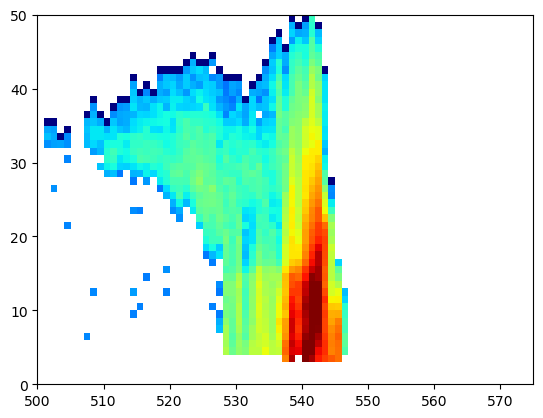

In [31]:
for f in sorted(fCMB)[12:]:
    with nc.Dataset(f) as ncF:
        print(ncF["KuKaGMI"].variables.keys())
        zKu=ncF["KuKaGMI/correctedReflectFactor"][:,:,:,0]
    break
plt.pcolormesh(zKu[:,24,::-1].T,vmin=0,vmax=50,cmap="jet")
plt.xlim(500,575)
plt.ylim(0,50)
print(f)
#f1="/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190501-S092409-E093249.029382.V07A.HDF5"
#f2="/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190502-S100527-E101407.029398.V07A.HDF5"
